# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

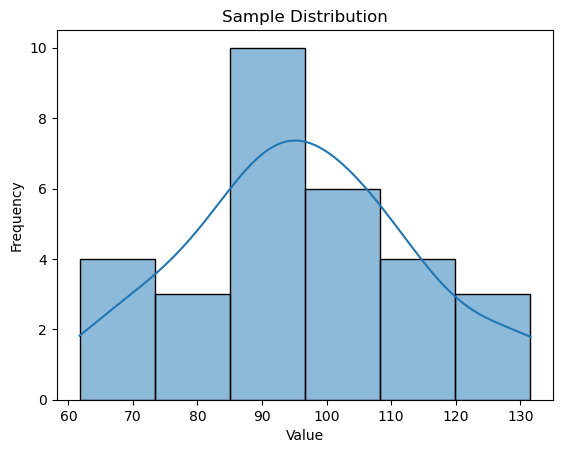

{'sample_mean': 96.23706208297925, 'sample_std': 18.000128548048227, 't_value': -1.145017367038331, 'p_value': 0.2615641461880146, 'reject_null': False}


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def one_sample_ttest(sample, popmean, alpha):
    """
    Parameters
    ----------
    sample: ndarray
        A random sample from the population
    popmean: float
        The population mean
    alpha: float
        The significance level
    
    Returns
    ----------
    results : dict
        A dictionary containing the sample mean, sample standard deviation, t-value, p-value, and whether the null hypothesis is rejected
    """
    # Visualize sample distribution for normality
    sns.histplot(sample, kde=True)
    plt.title('Sample Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    # Population mean
    population_mean = popmean

    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)

    # Sample Standard Deviation (sigma) using NumPy
    sample_std = np.std(sample, ddof=1)  # ddof=1 to get the sample standard deviation

    # Degrees of freedom
    degrees_of_freedom = len(sample) - 1

    # Calculate the critical t-value
    critical_t = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

    # Calculate the t-value and p-value
    t_value, p_value = stats.ttest_1samp(sample, population_mean)

    # Determine if the null hypothesis is rejected
    reject_null = p_value < alpha

    # Return results
    results = {
        'sample_mean': sample_mean,
        'sample_std': sample_std,
        't_value': t_value,
        'p_value': p_value,
        'reject_null': reject_null
    }
    return results

# Test the function
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=100, scale=20, size=30)
popmean = 100
alpha = 0.05

results = one_sample_ttest(sample, popmean, alpha)
print(results)


### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

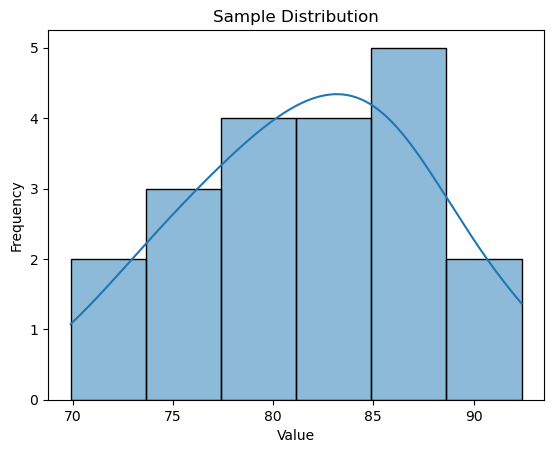

Original Sample Results:
{'sample_mean': 81.80000000000001, 'sample_std': 5.9216818379134235, 't_value': 12.687592157174493, 'p_value': 1.0053355594452825e-10, 'reject_null': True}


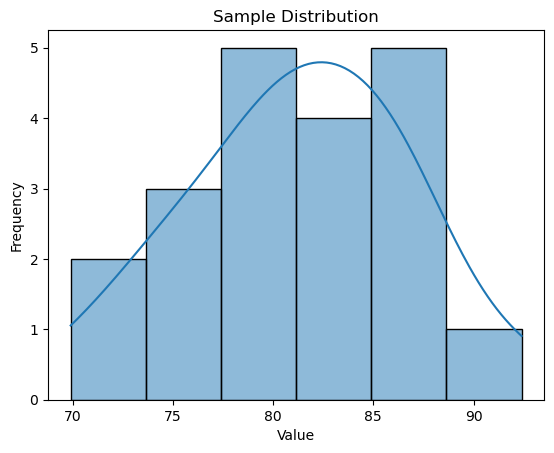

Corrected Sample Results:
{'sample_mean': 81.30000000000001, 'sample_std': 5.521536780738914, 't_value': 13.202088288314906, 'p_value': 5.083361606682268e-11, 'reject_null': True}
Effect Size (Cohen's d) for Original Sample: 2.837031853423536


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def one_sample_ttest(sample, popmean, alpha):
    """
    Parameters
    ----------
    sample: ndarray
        A random sample from the population
    popmean: float
        The population mean
    alpha: float
        The significance level
    
    Returns
    ----------
    results : dict
        A dictionary containing the sample mean, sample standard deviation, t-value, p-value, and whether the null hypothesis is rejected
    """
    # Visualize sample distribution for normality
    sns.histplot(sample, kde=True)
    plt.title('Sample Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    # Population mean
    population_mean = popmean

    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)

    # Sample Standard Deviation (sigma) using NumPy
    sample_std = np.std(sample, ddof=1)  # ddof=1 to get the sample standard deviation

    # Degrees of freedom
    degrees_of_freedom = len(sample) - 1

    # Calculate the critical t-value
    critical_t = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

    # Calculate the t-value and p-value
    t_value, p_value = stats.ttest_1samp(sample, population_mean)

    # Determine if the null hypothesis is rejected
    reject_null = p_value < alpha

    # Return results
    results = {
        'sample_mean': sample_mean,
        'sample_std': sample_std,
        't_value': t_value,
        'p_value': p_value,
        'reject_null': reject_null
    }
    return results

# Original sample scores
sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Population mean before the test
popmean = 65

# Significance level
alpha = 0.05

# Test the original sample
original_results = one_sample_ttest(sample_scores, popmean, alpha)
print("Original Sample Results:")
print(original_results)

# Corrected sample scores (correcting 90.9 to 80.9)
corrected_sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                           78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Test the corrected sample
corrected_results = one_sample_ttest(corrected_sample_scores, popmean, alpha)
print("Corrected Sample Results:")
print(corrected_results)

# Calculate the effect size (Cohen's d) for the original sample
def cohen_d(sample, popmean):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    d = (sample_mean - popmean) / sample_std
    return d

effect_size = cohen_d(sample_scores, popmean)
print("Effect Size (Cohen's d) for Original Sample:", effect_size)


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 